### 1. Import libraries

### 2. Import data

### 3. Subset data

### 4. Clean data
  <ul>
<li>4.1 Check columns</li>
    <li>4.2 Check missing values</li>
    <li>4.3 Check duplicates</li>
  </ul>

### 5. The Elbow technique

### 6. K-means clustering

### 7. Descriptive statistics 

### 8. Scatterplot

### 9. Line chart

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Import data

In [3]:
# Creata a path

path = r'/Users/marie/Documents/CareerFoundry/11-2021 City Temperatures'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_temperatures_more_clean.csv'))

# 3. Subset data

In [14]:
# Create a subset of the dataframe to only keep the first year of the dataset.

sub_95 = df[df['Year']== 1995]

In [16]:
sub_95.shape

(118616, 2)

In [32]:
# Create a subset of the dataframe to only keep the last year of the dataset.

sub_19 = df[df['Year']== 2019]

In [33]:
sub_19.shape

(106337, 2)

# 4. Clean data

### 4.1 Check columns

In [17]:
# Check columns for sub_95

sub_95.columns

Index(['Year', 'AvgTemperature'], dtype='object')

In [34]:
# Check columns for sub_19

sub_19.columns

Index(['Year', 'AvgTemperature'], dtype='object')

### 4.2 Check missing values

In [18]:
# Check for missing values for sub_95

sub_95.isnull().sum()

Year              0
AvgTemperature    0
dtype: int64

In [35]:
# Check for missing values for sub_19

sub_19.isnull().sum()

Year              0
AvgTemperature    0
dtype: int64

### 4.3 Check duplicates

In [19]:
# Check for duplicates for sub_95

dups = sub_95.duplicated()

In [20]:
dups.shape

(118616,)

In [36]:
# Check for duplicates for sub_19

dups_2 = sub_19.duplicated()

In [37]:
dups_2.shape

(106337,)

# 5. The Elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(sub_95).score(sub_95) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-41051579.78207295,
 -13322097.65258029,
 -6603564.088526552,
 -3993439.9745955276,
 -2759253.247680204,
 -2022736.0808845835,
 -1525084.3914631198,
 -1228719.6375988657,
 -976227.015074683]

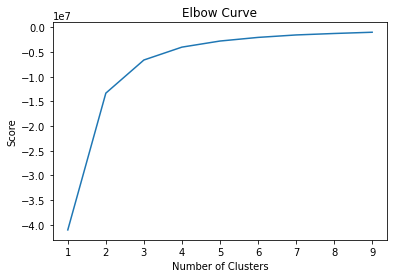

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for the cluster is 3.

# 6. K-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(sub_95)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [25]:
sub_95['clusters'] = kmeans.fit_predict(sub_95)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-25-86d10b279c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_95['clusters'] = kmeans.fit_predict(sub_95)


In [40]:
sub_19['clusters'] = kmeans.fit_predict(sub_19)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-40-fbc39f50e6ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_19['clusters'] = kmeans.fit_predict(sub_19)


In [26]:
sub_95.head()

,Year,AvgTemperature,clusters
0,1995,64.2,0
1,1995,49.4,0
2,1995,48.8,0
3,1995,46.4,0
4,1995,47.9,0


In [27]:
# Clusters count for subset_1995

sub_95['clusters'].value_counts()

0    49634
1    43578
2    25404
Name: clusters, dtype: int64

In [41]:
sub_19.head()

,Year,AvgTemperature,clusters
8767,2019,50.6,2
8768,2019,49.9,2
8769,2019,50.9,2
8770,2019,50.6,2
8771,2019,49.7,2


In [42]:
# Clusters count for subset_2019

sub_19['clusters'].value_counts()

0    45306
2    38169
1    22862
Name: clusters, dtype: int64

# 7. Descriptive statistics for the clusters

In [28]:
# Group by "clusters" using loc.

sub_95.loc[sub_95['clusters'] == 2, 'cluster'] = 'dark purple'
sub_95.loc[sub_95['clusters'] == 1, 'cluster'] = 'purple'
sub_95.loc[sub_95['clusters'] == 0, 'cluster'] = 'pink'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [29]:
# Print the descriptive statistics for the clusters in sub_95.

sub_95.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'AvgTemperature':['mean', 'median']})

Year        AvgTemperature       
             mean median           mean median
cluster                                       
dark purple  1995   1995      31.590076   34.0
pink         1995   1995      58.067595   59.2
purple       1995   1995      77.778563   77.6

In [43]:
# Group by "clusters" using loc.

sub_19.loc[sub_19['clusters'] == 2, 'cluster'] = 'dark purple'
sub_19.loc[sub_19['clusters'] == 1, 'cluster'] = 'purple'
sub_19.loc[sub_19['clusters'] == 0, 'cluster'] = 'pink'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [44]:
# Print the descriptive statistics for the clusters in sub_19.

sub_19.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'AvgTemperature':['mean', 'median']})

Year        AvgTemperature       
             mean median           mean median
cluster                                       
dark purple  2019   2019      57.479460   58.0
pink         2019   2019      78.499018   78.5
purple       2019   2019      32.772920   35.5

# 8. Scatterplot

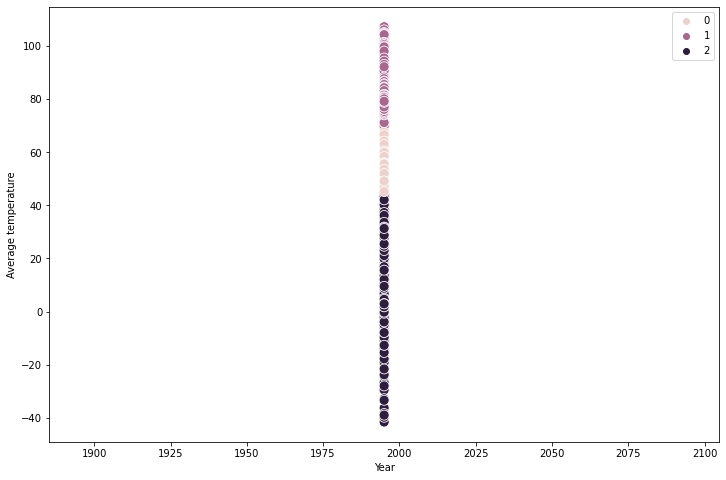

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot the clusters for the "Year" and "AvgTemperature" variables for subset_1995.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_95['Year'], y=sub_95['AvgTemperature'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Average temperature') # Label y-axis.
plt.show()
plt.savefig('scatterplot_95.png') # save picture in Python folder

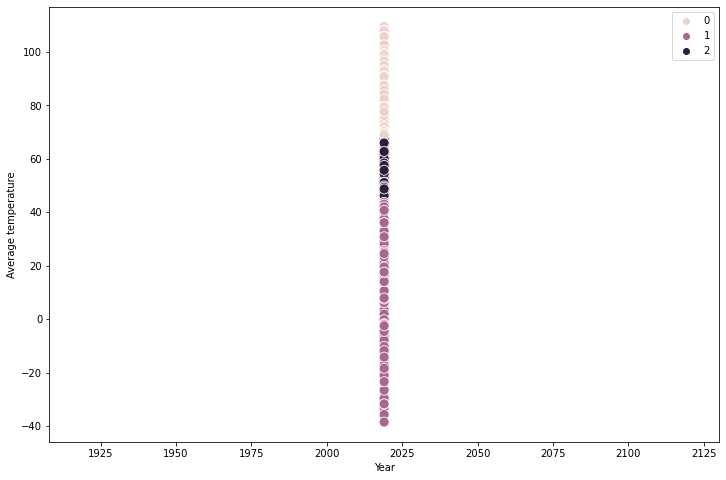

<Figure size 432x288 with 0 Axes>

In [45]:
# Plot the clusters for the "Year" and "AvgTemperature" variables for subset_2019

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_19['Year'], y=sub_19['AvgTemperature'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Average temperature') # Label y-axis.
plt.show()
plt.savefig('scatterplot_19.png') # save picture in Python folder

#### I chosed to compare the first and the last year in the dataset. If I make a Scatterplot of the whole data set it will only be dots all over the the chart.

# 9. Line chart

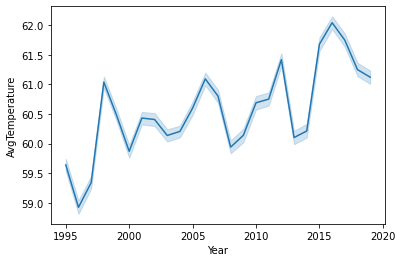

In [46]:
# Create a line chart for another type of vizualisation.

line = sns.lineplot(data = df, x = 'Year',y = 'AvgTemperature')

#### Here you can clearly see how the temperature rises over time. The largest peak 2016-2017.

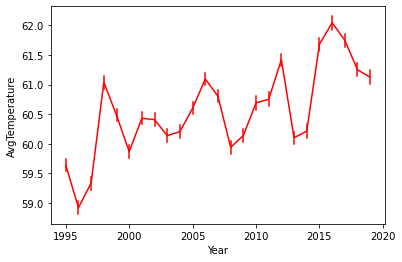

In [79]:
# Create another type of linechart

sns.lineplot(x = 'Year', y = 'AvgTemperature', color='r', err_style='bars', data = df)
plt.show()